# JobStock - Analysing the attractiveness of jobs by considering stock data

DSI Project 2021 - Group B<br>
Team: Kovacs, Michalitsch, Neumüller, Schweighofer

# Overview

The goal of this project is to combine information about job postings and the stock market.
The hypothesis is that there is a certain correlation between financial success of a company (or country) and the demand for new personnel. From an other point of view, one might rate the attractiveness of a job offering higher if the company is doing well financially.

The proposed data framework will provide answers to questions like "are companies with increasing stock values looking for more staff?", "how does the demand of specific job type depend on the development of certain index?" and "what are the most common tools for certain job types (R vs. Python for data scientist)?".
Additionally, the data can also be used to make suggestions to job seekers based on criteria such as company's evaluation on the stock market.

In this project, the focus is on the technical implementation of the data framework (from the data source to the data visualization) rather than on a detailed analysis of the content and story telling.


# Project definition (subject to changes)

## Scope
* The focus in this project is on job titles in the context of IT and data (e.g., "data scientist", "data engineering", and "data analyst)"
* The proof of concept will be given by looking at the German speaking area (Austria, Germany, Switzerland). However, scalability will be considered by selecting appropriate tools (e.g. distributed computing). 

## Use Cases
* Most searched key words or skills
* Evaluation of specific companies based on job search profile and market evaluation
* Personal job recommendations (based on trend of stock development)

## Output
* Graph showing average income per job title
* Graph showing number of ads per job title per month
* Table with possible jobs based on filters for the user (e.g., location, job title, skills)
* Graph comparing index of a company with number of job ads
* Table giving a ranking of skills



# Project Management

## Working mode
* All project data will be stored in a git repository. Every team member can access the data:(https://git.technikum-wien.at/fcs-mds1/lv-ds-infrastructure/gr_ds21m031/dsinv_groupproject_b1.git)
* There are regular team meetings for alignment, collaboration and review (regular jour fixe on Saturdays via Zoom)
* Passwords and access to data are available to all team members
* Each team member is responsible for everything unless otherwise stated (i.e., collaborative working mode and democratic decision making without "project leader" etc.)

## Milestones

* Project proposal is finalized and handed in: 15.12.2021
* Data is loaded into respective data storage: 22.12.2021
* Data analysis in Spark ready: 25.12.2021
* First Visualization front end ready: 02.01.2022
* Project presentation: 12.01.2022


# Data sources


## SerpAPI - Google Jobs Results API

The Google Jobs API can be used to retrieve Search Engine Result Pages (SERP) from Google Jobs searches. The API is accessed through the following endpoint: /search?engine=google_jobs. Users can query https://serpapi.com/search?engine=google_jobs utilizing a GET request.

The data is accessed via Google-API. The output is given in JSON and contains the following data:
* Job title
* Company name
* Location
* Description
* Extensions (salary, full/part time)
* ...

The API is accessed as follows:
```
search = GoogleSearch(params_google)
results = search.get_dict()
jobs_results = results['jobs_results']
```

## Yahoo Finance - Stock Market Live, Quotes, Business 

Yahoo Finance belongs to the Yahoo network and provides financial news, data and commentary including stock quotes, press releases, financial reports, and original content. 
The data is accessed via yfinance which  is an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes.

yfinance is not affiliated, endorsed, or vetted by Yahoo. 

The output of yfinance is given in a Pandas DataFrame and contains the typical stock data.
The API is accessed as follows:
```
data = yf.download(list(atx_indices["ISIN"]), start="2020-12-01", end="2020-12-31")

```

# Data Infrastructure

This section gives an overview of the planned infrastructure.




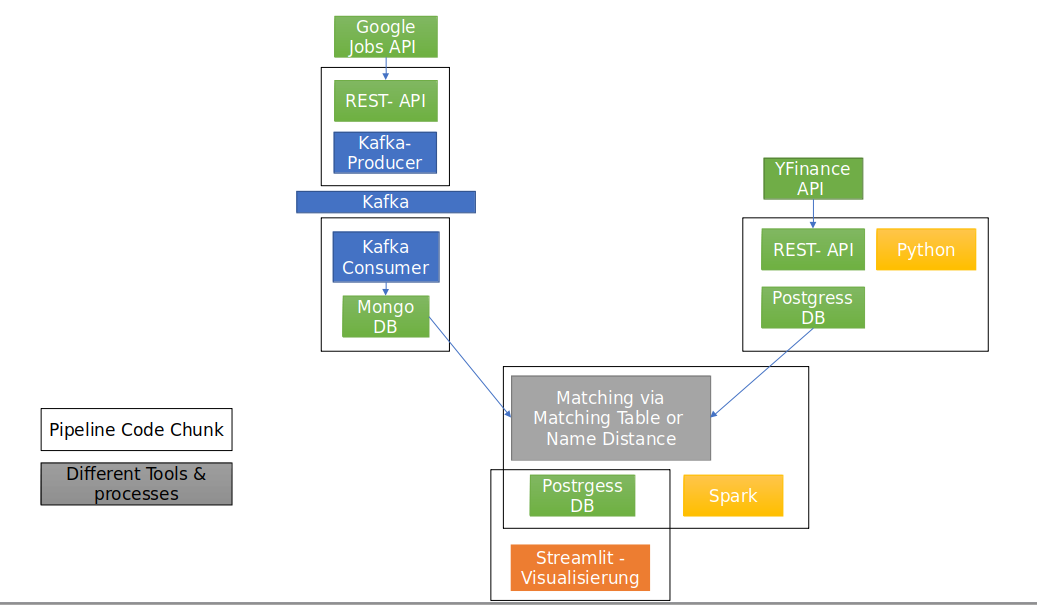

## Data streaming via Kafka

Kafka is a framework for stream-processing. Kafka enables a unified, high-throughput, low-latency platform for handling real-time data feeds.
The data as described above will be extracted and loaded into the respective database via Kafka Message Broker.


## Data storage SQL and NoSQL

A classical relational database is well suited for the structured stock data.
Job ads form different countries are stored in documents which is perfect for NoSQL databases such as MongoDB.

The results of the merged data will be stored in a postgres data base (both database worlds are connected with JSON in PostgreSQL).

## Data handling via Spark

Data will be extracted from the databases and processed by using Spark. The parallelization of the potentially large data frames increases the performance of the application.  
The two data bases will be matched by providing a matching table, joining companies (or countries) posting jobs and companies (or countries) with stock indices.

## Data visualisation via Streamlit

The focus of the project is to setup the data infrastructure. Nevertheless, a rudimentary streamlit frontend will be provided for testing and first analysis.